# Logistic Regression

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression,LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split ,GridSearchCV,RandomizedSearchCV


from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy.stats import zscore
from scipy.stats import boxcox

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
from sklearn.metrics import plot_confusion_matrix,roc_curve,multilabel_confusion_matrix
from sklearn.datasets import load_boston,load_iris

import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('diabetes.csv')
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [6]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
500/(268+500) # >> 0.65 >> if ratio is above 0.75 then it is inbalnced but its fine but data is above 0.8 ratio
                        # then it is highly inbalance so that time we have to handle that.
# 1-0.65=0.35
# 0.65 >> it is ratio of class-0
# 0.35 >> it is ratio of class-1
# that is why we didnt balanced data here.

0.6510416666666666

<AxesSubplot:xlabel='Outcome', ylabel='count'>

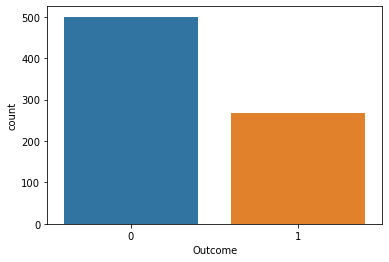

In [8]:
sns.countplot(x=df['Outcome'])  # countplot for categorical & pairplot for numerical as well scatterplot for numerical

In [9]:
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1


# Train Test Split

In [10]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1) # always use this it is preferred than stratify

In [12]:
y_train.value_counts() # 401/(401+213) >> 0.6530

0    401
1    213
Name: Outcome, dtype: int64

In [13]:
y_test.value_counts() # 99/(99+55) >> 0.6428

0    99
1    55
Name: Outcome, dtype: int64

## with stratify function

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)

In [42]:
y_train.value_counts() # 400/(400+214) >> 0.6514

0    400
1    214
Name: Outcome, dtype: int64

In [43]:
y_test.value_counts() # 100/(100+54) >> 0.6493

0    100
1     54
Name: Outcome, dtype: int64

# model training

In [14]:
lg_model=LogisticRegression()
lg_model.fit(x_train,y_train)

LogisticRegression()

# Evaluation for Testing

In [15]:
y_pred=lg_model.predict(x_test)

cnf_matrix=confusion_matrix(y_test,y_pred)
print('confusion matrix is :\n',cnf_matrix)

print('*'*100)
acc=accuracy_score(y_test,y_pred)
print('accuracy is :',acc)
print("*"*100)

clf_report=classification_report(y_test,y_pred)
print('classification report is :\n',clf_report)


confusion matrix is :
 [[89 10]
 [25 30]]
****************************************************************************************************
accuracy is : 0.7727272727272727
****************************************************************************************************
classification report is :
               precision    recall  f1-score   support

           0       0.78      0.90      0.84        99
           1       0.75      0.55      0.63        55

    accuracy                           0.77       154
   macro avg       0.77      0.72      0.73       154
weighted avg       0.77      0.77      0.76       154



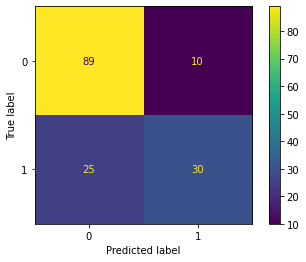

In [16]:
plot_confusion_matrix(lg_model,x_test,y_test)

In [17]:
89+30+10+25 # Total Number of Datapoints

154

In [18]:
Accuracy=(89+30)/(89+30+10+25)
Accuracy

0.7727272727272727

In [19]:
# class1_precision=TP/TP+FP (we consider only for class-1)
30/(30+10)

0.75

In [20]:
# class0_precision=TN/TN+FN
89/(89+25)

0.7807017543859649

In [21]:
# class1_recall=TP/TP+FN
30/(30+25)

0.5454545454545454

In [22]:
# class0_recall=TN/TN+FP
89/(89+10)

0.898989898989899

In [23]:
# class1_f1_score=2PR/P+R
2*0.78*0.90/(0.78+0.90)

0.8357142857142857

In [24]:
# class0_f1_score=2PR/P+R
2*0.75*0.55/(0.75+0.55)

0.6346153846153847

In [25]:
y_pred # it gives the prediction of class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [26]:
y_pred_prob=lg_model.predict_proba(x_test) #it gives the probability values for class 0 and class 1
# check values of y_pred and y_pred_prob values of prediction and class values are same.

In [27]:
y_pred_prob # first value is for class-1,and second value is for class-0.

array([[0.57575116, 0.42424884],
       [0.64919057, 0.35080943],
       [0.88857617, 0.11142383],
       [0.93490024, 0.06509976],
       [0.75902176, 0.24097824],
       [0.68287223, 0.31712777],
       [0.65777888, 0.34222112],
       [0.87759428, 0.12240572],
       [0.81143648, 0.18856352],
       [0.76609784, 0.23390216],
       [0.60774388, 0.39225612],
       [0.89633567, 0.10366433],
       [0.013846  , 0.986154  ],
       [0.3727009 , 0.6272991 ],
       [0.96184454, 0.03815546],
       [0.313868  , 0.686132  ],
       [0.7136684 , 0.2863316 ],
       [0.68961473, 0.31038527],
       [0.88193711, 0.11806289],
       [0.88331158, 0.11668842],
       [0.56475718, 0.43524282],
       [0.88032801, 0.11967199],
       [0.13173214, 0.86826786],
       [0.82695226, 0.17304774],
       [0.92065726, 0.07934274],
       [0.57139402, 0.42860598],
       [0.7808154 , 0.2191846 ],
       [0.35830931, 0.64169069],
       [0.88686723, 0.11313277],
       [0.56118265, 0.43881735],
       [0.

In [28]:
89+30+10+25

154

In [29]:
(89+30)/(89+30+10+25)

0.7727272727272727

# Evaluation for Training

In [30]:
y_pred_train=lg_model.predict(x_train)
cnf_matrix=confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix is:\n',cnf_matrix)

print('*'*90)
acc = accuracy_score(y_train,y_pred_train)
print('Accuracy Score is: ', acc)
print('*'*90)

clf_report = classification_report(y_train,y_pred_train)
print('\nClassification Report is :\n', clf_report)

Confusion Matrix is:
 [[352  49]
 [ 91 122]]
******************************************************************************************
Accuracy Score is:  0.7719869706840391
******************************************************************************************

Classification Report is :
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       401
           1       0.71      0.57      0.64       213

    accuracy                           0.77       614
   macro avg       0.75      0.73      0.73       614
weighted avg       0.77      0.77      0.77       614



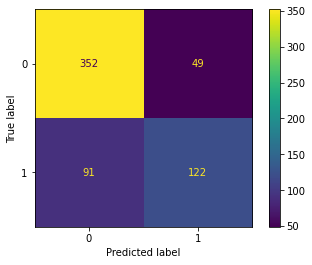

In [31]:
plot_confusion_matrix(lg_model,x_train,y_train)

## weighted avg

## macro Average

In [32]:
# 401/(401+213) >> 0.65 >> Support values of class-0 >> class-0/(class-0 + class-1)
# 213/(401+213)   >> 0.34 >> Support values of class-1 >> class-1/(class-1 + class-0)
0.79*0.65 + 0.71*0.34 # >> precision class-0*support value class-0 + precision class-1*support value class-1

# Same procedure for recall and f-1 score only while calculation consider values those

0.7549000000000001

In [33]:
y_pred_train_prob=lg_model.predict_proba(x_train)

In [34]:
y_pred_train_prob

array([[0.3660761 , 0.6339239 ],
       [0.39554483, 0.60445517],
       [0.73640941, 0.26359059],
       ...,
       [0.39647639, 0.60352361],
       [0.15379882, 0.84620118],
       [0.73659926, 0.26340074]])

In [35]:
y_pred_train_prob[:,1]

array([0.6339239 , 0.60445517, 0.26359059, 0.35357298, 0.33430397,
       0.01989233, 0.58264966, 0.62359398, 0.24327872, 0.04378316,
       0.20757245, 0.26021731, 0.2877748 , 0.6758647 , 0.7925677 ,
       0.55720486, 0.92344067, 0.74321531, 0.19517765, 0.09269685,
       0.69678331, 0.3631836 , 0.87469975, 0.19515233, 0.13446869,
       0.15973911, 0.31518422, 0.75010476, 0.08783956, 0.87819345,
       0.04378208, 0.06086447, 0.04194025, 0.79138519, 0.30631886,
       0.16804001, 0.10741868, 0.05184615, 0.09656949, 0.10571771,
       0.77871874, 0.09258564, 0.28857477, 0.14020401, 0.23316582,
       0.78840905, 0.89021487, 0.43031376, 0.12234219, 0.10687853,
       0.53731944, 0.77744545, 0.0486217 , 0.09106649, 0.18199742,
       0.69388652, 0.07899824, 0.45591665, 0.14977472, 0.49513176,
       0.18857018, 0.40367521, 0.21917153, 0.04137003, 0.23662362,
       0.42635355, 0.14331193, 0.1518646 , 0.05551697, 0.93737088,
       0.29537137, 0.30304624, 0.0958706 , 0.12753665, 0.05796

In [36]:
y_pred_train_prob[:,1].shape

(614,)

In [37]:
fpr,tpr,thresh=roc_curve(y_train,y_pred_train_prob[:,1])

In [39]:
thresh

array([1.96370721, 0.96370721, 0.95649475, 0.94306936, 0.93991298,
       0.91435109, 0.90511457, 0.85473575, 0.85433269, 0.84539779,
       0.84520493, 0.81689971, 0.81356687, 0.80780261, 0.80520189,
       0.79597807, 0.79138519, 0.77871874, 0.77852063, 0.77744545,
       0.75821969, 0.75134595, 0.74801745, 0.74028858, 0.73907251,
       0.73349354, 0.73309085, 0.7252856 , 0.7204914 , 0.71103068,
       0.70840301, 0.67905314, 0.67696164, 0.6689247 , 0.66267053,
       0.6543593 , 0.64133656, 0.62337062, 0.61899548, 0.60984453,
       0.60452589, 0.59670685, 0.59549234, 0.59504348, 0.59323657,
       0.59209293, 0.59099823, 0.59000703, 0.58624572, 0.57595291,
       0.57456771, 0.56699543, 0.56520942, 0.55794003, 0.55337587,
       0.54605573, 0.53756921, 0.53273366, 0.52898574, 0.51674365,
       0.51523809, 0.51463227, 0.51061903, 0.5082386 , 0.50217333,
       0.49513176, 0.49100754, 0.49027852, 0.48266159, 0.48238693,
       0.47957287, 0.47316505, 0.43341152, 0.43326773, 0.43017

In [40]:
thresh.shape

(185,)

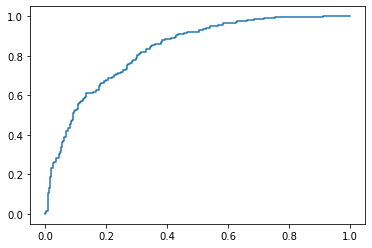

In [41]:
plt.plot(fpr,tpr)

Text(0.5, 1.0, 'Reciever Operating Charaxteristic Curve')

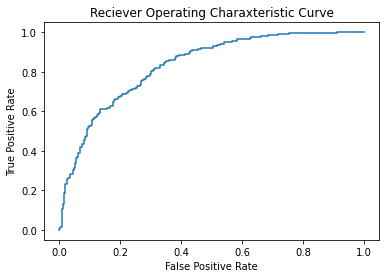

In [42]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Charaxteristic Curve')

###### now do same steps for testing dataset for getting roc curve 

In [43]:
y_pred_prob[:,1] # for Testing ploting graph and fpr values counting so consider this values

array([0.42424884, 0.35080943, 0.11142383, 0.06509976, 0.24097824,
       0.31712777, 0.34222112, 0.12240572, 0.18856352, 0.23390216,
       0.39225612, 0.10366433, 0.986154  , 0.6272991 , 0.03815546,
       0.686132  , 0.2863316 , 0.31038527, 0.11806289, 0.11668842,
       0.43524282, 0.11967199, 0.86826786, 0.17304774, 0.07934274,
       0.42860598, 0.2191846 , 0.64169069, 0.11313277, 0.43881735,
       0.41189649, 0.23614662, 0.06079931, 0.7744207 , 0.18159704,
       0.75851426, 0.08832646, 0.19831654, 0.06434978, 0.44334264,
       0.24201852, 0.10757175, 0.03828035, 0.37141583, 0.08642921,
       0.02585101, 0.38090967, 0.82383099, 0.08026883, 0.13181364,
       0.00825169, 0.1801426 , 0.79458505, 0.05699098, 0.6152706 ,
       0.10475721, 0.54197141, 0.29909484, 0.61436819, 0.15459688,
       0.60888628, 0.01280213, 0.67488118, 0.22248384, 0.45152541,
       0.12301666, 0.01137584, 0.51667655, 0.54375309, 0.57205895,
       0.86634343, 0.80341866, 0.54710961, 0.01670263, 0.64271

###### we are checking values respectly training like fpr tpr

In [44]:
tpr

array([0.        , 0.00469484, 0.00469484, 0.01408451, 0.01408451,
       0.04694836, 0.04694836, 0.10798122, 0.10798122, 0.1314554 ,
       0.1314554 , 0.18779343, 0.18779343, 0.20657277, 0.20657277,
       0.23004695, 0.23004695, 0.25821596, 0.25821596, 0.2629108 ,
       0.2629108 , 0.28169014, 0.28169014, 0.30516432, 0.30516432,
       0.31455399, 0.31455399, 0.3286385 , 0.3286385 , 0.33802817,
       0.33802817, 0.36150235, 0.36150235, 0.37089202, 0.37089202,
       0.38967136, 0.38967136, 0.41784038, 0.41784038, 0.43661972,
       0.43661972, 0.45070423, 0.45070423, 0.45539906, 0.45539906,
       0.46948357, 0.46948357, 0.4741784 , 0.4741784 , 0.51173709,
       0.51173709, 0.52112676, 0.52112676, 0.5258216 , 0.5258216 ,
       0.53051643, 0.53051643, 0.55399061, 0.55399061, 0.56338028,
       0.56338028, 0.56807512, 0.56807512, 0.57276995, 0.57276995,
       0.58215962, 0.58215962, 0.58685446, 0.58685446, 0.5915493 ,
       0.5915493 , 0.61032864, 0.61032864, 0.61502347, 0.61502

In [45]:
fpr

array([0.        , 0.        , 0.00249377, 0.00249377, 0.0074813 ,
       0.0074813 , 0.00997506, 0.00997506, 0.01246883, 0.01246883,
       0.01496259, 0.01496259, 0.01745636, 0.01745636, 0.01995012,
       0.01995012, 0.02493766, 0.02493766, 0.02743142, 0.02743142,
       0.03491272, 0.03491272, 0.04488778, 0.04488778, 0.04738155,
       0.04738155, 0.04987531, 0.04987531, 0.05236908, 0.05236908,
       0.05486284, 0.05486284, 0.05735661, 0.05735661, 0.05985037,
       0.05985037, 0.06733167, 0.06733167, 0.07481297, 0.07481297,
       0.0798005 , 0.0798005 , 0.08229426, 0.08229426, 0.08478803,
       0.08478803, 0.0872818 , 0.0872818 , 0.08977556, 0.08977556,
       0.09476309, 0.09476309, 0.09725686, 0.09725686, 0.10224439,
       0.10224439, 0.10723192, 0.10723192, 0.10972569, 0.10972569,
       0.11221945, 0.11221945, 0.11720698, 0.11720698, 0.12219451,
       0.12219451, 0.12718204, 0.12718204, 0.12967581, 0.12967581,
       0.13466334, 0.13466334, 0.15710723, 0.15710723, 0.16458

In [46]:
thresh

array([1.96370721, 0.96370721, 0.95649475, 0.94306936, 0.93991298,
       0.91435109, 0.90511457, 0.85473575, 0.85433269, 0.84539779,
       0.84520493, 0.81689971, 0.81356687, 0.80780261, 0.80520189,
       0.79597807, 0.79138519, 0.77871874, 0.77852063, 0.77744545,
       0.75821969, 0.75134595, 0.74801745, 0.74028858, 0.73907251,
       0.73349354, 0.73309085, 0.7252856 , 0.7204914 , 0.71103068,
       0.70840301, 0.67905314, 0.67696164, 0.6689247 , 0.66267053,
       0.6543593 , 0.64133656, 0.62337062, 0.61899548, 0.60984453,
       0.60452589, 0.59670685, 0.59549234, 0.59504348, 0.59323657,
       0.59209293, 0.59099823, 0.59000703, 0.58624572, 0.57595291,
       0.57456771, 0.56699543, 0.56520942, 0.55794003, 0.55337587,
       0.54605573, 0.53756921, 0.53273366, 0.52898574, 0.51674365,
       0.51523809, 0.51463227, 0.51061903, 0.5082386 , 0.50217333,
       0.49513176, 0.49100754, 0.49027852, 0.48266159, 0.48238693,
       0.47957287, 0.47316505, 0.43341152, 0.43326773, 0.43017

In [47]:
# best threshold
sub=tpr-fpr
ab = np.argmax(sub)
best_thresh = thresh[ab]
print('Best Threshold = ',(best_thresh))

Best Threshold =  0.2605693426817198


In [42]:
thresh # 0.50217155
np.where(thresh>=0.5) # in output indexes numbers has been came which index value is greater than or equal to 0.5 
                      # we finding index bcz we want get fpr and tpr values for than index

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64],
       dtype=int64),)

In [43]:
thresh[64]

0.5021712578414997

In [44]:
tpr[64]

0.5727699530516432

In [45]:
fpr[64]

0.12219451371571072